In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
def text_to_dataframe(filename):
    with open(filename, "r") as f:
        data_list = f.readlines()
        count = 0
        data = pd.DataFrame()
        for line in data_list:
            line = line.replace('\n','').split(';')
            data.loc[count, "words"] = line[0]
            data.loc[count, "emotions"] = line[1]
            count += 1
        return data

train_data = text_to_dataframe("data/train.txt" )
test_data = text_to_dataframe("data/test.txt" )
val_data = text_to_dataframe("data/val.txt" )

#### Analytics of Emotions Across All Dataset

**Emotion analysis for the training dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

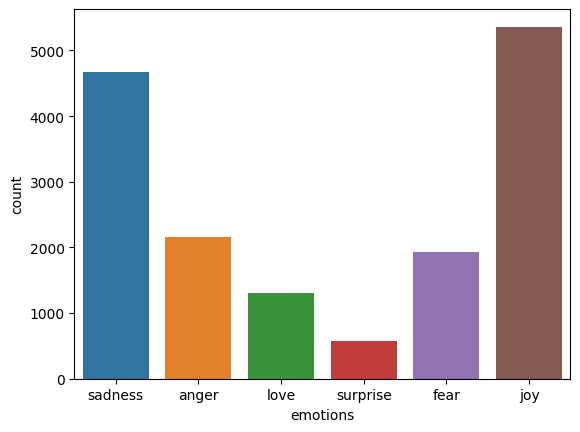

In [22]:
sns.countplot(x="emotions", data=train_data)

**Emotion analysis for the test dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

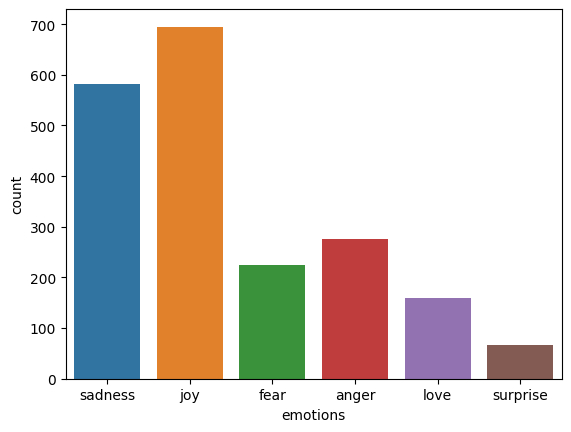

In [23]:
sns.countplot(x="emotions", data=test_data)

**Emotion analysis for the validation dataset**

<AxesSubplot:xlabel='emotions', ylabel='count'>

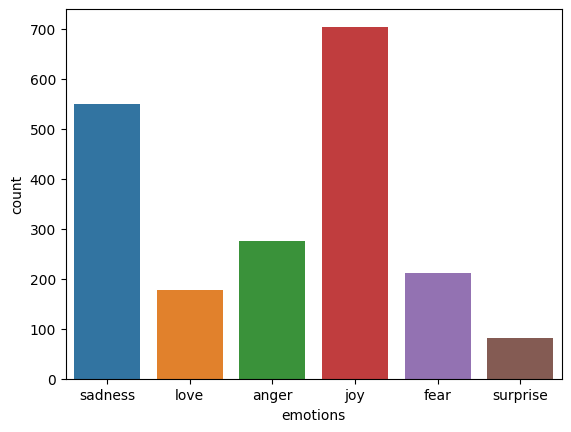

In [24]:
sns.countplot(x="emotions", data=val_data)

**From largest to smallet across all datasets we have:**

1. Joy
2. Sadness
3. Anger
4. Love
5. Suprise

> “You cannot protect yourself from sadness without protecting yourself from happiness.” ― Jonathan Safran Foer

In [26]:
train_data

,words,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


#### Text Preprocessing

In [58]:
import nltk

from textblob import TextBlob
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [61]:
# The datasets have been previously cleaned by conversion to lowercase, removing punctuations and extra whitespaces. 
# I'll just proceed preprocess it further with text correction, removal of stopwords, and lemmatiation. 

def preprocess_data(text):

    # text correction
    text = TextBlob(text)
    text =str(text.correct())

    # removing stopwords
    stopwords_list = stopwords.words("english")
    text = word_tokenize(text)
    text_wo_stopwords = [t for t in text if t not in stopwords_list]

    # lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text_wo_stopwords] 

    text = " ".join(lemmatized_words)

    return text

In [62]:
# Applying preprocessing function

train_data["words"] = train_data["words"].apply(preprocess_data)
test_data["words"] = test_data["words"].apply(preprocess_data)
val_data["words"] = val_data["words"].apply(preprocess_data)

In [67]:
# Converting files to parquet.

train_data.to_parquet("train_data.parquet")
test_data.to_parquet("test_data.parquet")
val_data.to_parquet("val_data.parquet")